#### The aim of this project is to predict the number of deaths due to covid 19. Its a regression problem. So accordingly data cleaning, pre-processing, exploratory data analysis is carried out.

Steps followed in the project:

1) Importing the packages/libraries

2) Reading the dataset

3) Checking the shape

4) Checking the info

5) Data cleaning( Treating the missing values, dropping unwanted columns/rows)

6) Exploratory data analysis

7) Label encoding/One hot encoding

8) Outlier treatment

9) Defining X and y(independent and dependent variable)

10) Splitting the data into train and test

11) Fitting different models using GridhSearchCV

12) Checking the metrics for model evaluation

In [315]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [316]:
df=pd.read_csv("csse_covid_19_daily_reports_us.txt")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [317]:
df.shape

(58, 18)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
Province_State          58 non-null object
Country_Region          58 non-null object
Last_Update             58 non-null object
Lat                     56 non-null float64
Long_                   56 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               42 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     33 non-null float64
Mortality_Rate          57 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    33 non-null float64
dtypes: float64(10), int64(4), object(4)
memory usage: 8.2+ KB


In [319]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [320]:
df.isnull().sum()/len(df)*100

Province_State           0.000000
Country_Region           0.000000
Last_Update              0.000000
Lat                      3.448276
Long_                    3.448276
Confirmed                0.000000
Deaths                   0.000000
Recovered               27.586207
Active                   0.000000
FIPS                     0.000000
Incident_Rate            3.448276
People_Tested            3.448276
People_Hospitalized     43.103448
Mortality_Rate           1.724138
UID                      0.000000
ISO3                     0.000000
Testing_Rate             3.448276
Hospitalization_Rate    43.103448
dtype: float64

Since Hospitalization_Rate and People_Hospitalized have more than 43% NaN values, we can drop those columns. Because fill those values are filled with median, mean or any value, it will affect the model the same way.

In [321]:
df['FIPS'].value_counts()

56       1
18       1
30       1
29       1
28       1
27       1
26       1
25       1
24       1
23       1
22       1
21       1
20       1
19       1
17       1
31       1
16       1
15       1
13       1
12       1
11       1
10       1
9        1
8        1
6        1
5        1
4        1
2        1
99999    1
32       1
33       1
34       1
78       1
72       1
69       1
66       1
60       1
88888    1
55       1
54       1
53       1
51       1
50       1
49       1
48       1
47       1
46       1
45       1
44       1
42       1
41       1
40       1
39       1
38       1
37       1
36       1
35       1
1        1
Name: FIPS, dtype: int64

Since FIPS-Federal Information Processing Standards code that uniquely identifies counties within the USA are unique. It won't have any effect on the output variable. So it can be dropped.

Checking the number of unique values in different columns

In [322]:
df['UID'].nunique()

58

In [323]:
df['ISO3'].nunique()

6

In [324]:
df['Lat'].nunique()

56

In [325]:
df['Long_'].nunique()

56

In [326]:
df['Province_State'].nunique()

58

In [327]:
df['Country_Region'].nunique()

1

From the above findings we can see that 'UID','Province_State' are having 58 different values. 'Country_Region' is having the same value all through the column. 'Lat' and 'Long_' donot have any effect on prediction.
Therefore all these columns can be dropped.

In [328]:
df['Last_Update']

0     2020-05-21 02:32:54
1     2020-05-21 02:32:54
2     2020-05-21 02:32:54
3     2020-05-21 02:32:54
4     2020-05-21 02:32:54
5     2020-05-21 02:32:54
6     2020-05-21 02:32:54
7     2020-05-21 02:32:54
8     2020-05-21 02:32:54
9     2020-05-21 02:32:54
10    2020-05-21 02:32:54
11    2020-05-21 02:32:54
12    2020-05-21 02:32:54
13    2020-05-21 02:32:54
14    2020-05-21 02:32:54
15    2020-05-21 02:32:54
16    2020-05-21 02:32:54
17    2020-05-21 02:32:54
18    2020-05-21 02:32:54
19    2020-05-21 02:32:54
20    2020-05-21 02:32:54
21    2020-05-21 02:32:54
22    2020-05-21 02:32:54
23    2020-05-21 02:32:54
24    2020-05-21 02:32:54
25    2020-05-21 02:32:54
26    2020-05-21 02:32:54
27    2020-05-21 02:32:54
28    2020-05-21 02:32:54
29    2020-05-21 02:32:54
30    2020-05-21 02:32:54
31    2020-05-21 02:32:54
32    2020-05-21 02:32:54
33    2020-05-21 02:32:54
34    2020-05-21 02:32:54
35    2020-05-21 02:32:54
36    2020-05-21 02:32:54
37    2020-05-21 02:32:54
38    2020-0

Since all the data has been taken on the same day, Last_Update column can be dropped.

##### Dropping the above mentioned columns

In [329]:
df.drop(['Country_Region','Province_State','Long_','Lat','UID','Hospitalization_Rate','People_Hospitalized','Last_Update','FIPS'],axis=1,inplace=True)
df.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'Mortality_Rate', 'ISO3', 'Testing_Rate'],
      dtype='object')

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
Confirmed         58 non-null int64
Deaths            58 non-null int64
Recovered         42 non-null float64
Active            58 non-null float64
Incident_Rate     56 non-null float64
People_Tested     56 non-null float64
Mortality_Rate    57 non-null float64
ISO3              58 non-null object
Testing_Rate      56 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.2+ KB


#### Filling the Null values

In [331]:
df['Testing_Rate'].fillna(value=df['Testing_Rate'].median(),inplace=True)
df['Mortality_Rate'].fillna(value=df['Mortality_Rate'].median(),inplace=True)
df['People_Tested'].fillna(value=df['People_Tested'].median(),inplace=True)
df['Incident_Rate'].fillna(value=df['Incident_Rate'].median(),inplace=True)
df['Recovered'].fillna(value=df['Recovered'].median(),inplace=True)

In [332]:
df.isnull().sum()

Confirmed         0
Deaths            0
Recovered         0
Active            0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
ISO3              0
Testing_Rate      0
dtype: int64

In [333]:
h=df.select_dtypes(include=float)

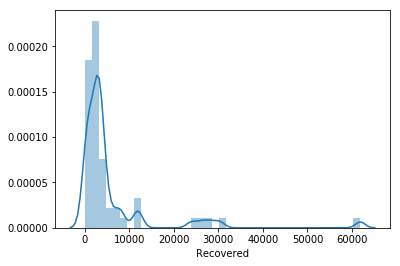

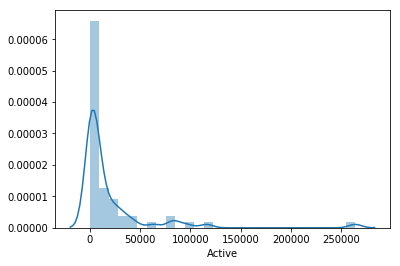

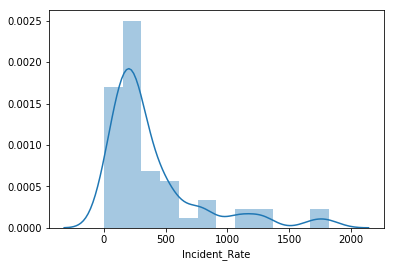

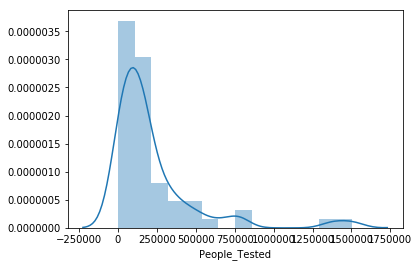

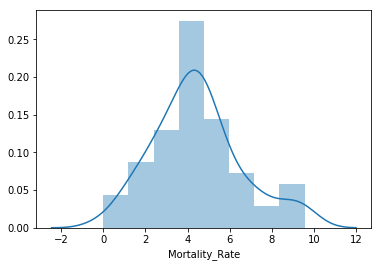

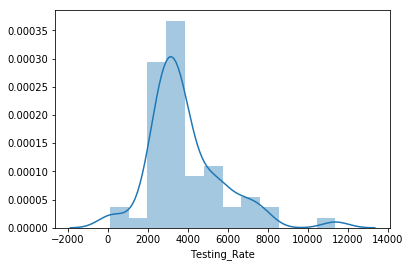

In [334]:
#distplot of continous variables
for i,x in enumerate(h):
    plt.figure(i)
    sns.distplot(h[x])

In [335]:
df.dtypes

Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
Incident_Rate     float64
People_Tested     float64
Mortality_Rate    float64
ISO3               object
Testing_Rate      float64
dtype: object

### EDA

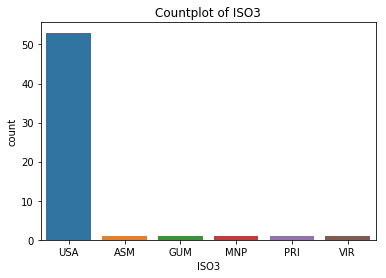

In [336]:
sns.countplot(df['ISO3'])
plt.title("Countplot of ISO3")
plt.show()

From the above countplot it cann be seen that USA has the highest count in ISO3

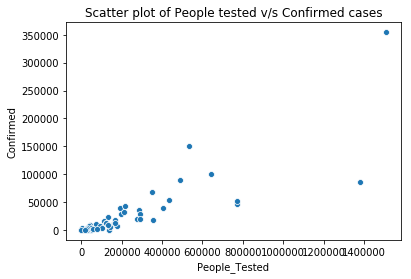

In [337]:
sns.scatterplot(df['People_Tested'],df['Confirmed'])
plt.title("Scatter plot of People tested v/s Confirmed cases")
plt.show()

From the above scatterplot it can be observed that People tested and confirmed are slightly positively correlated.

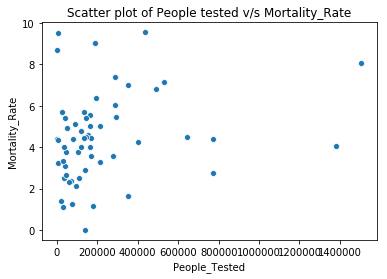

In [338]:
sns.scatterplot(df['People_Tested'],df['Mortality_Rate'])
plt.title("Scatter plot of People tested v/s Mortality_Rate")
plt.show()

From the above scatterplot it can be observed that People tested and mortality rate have very less correlation

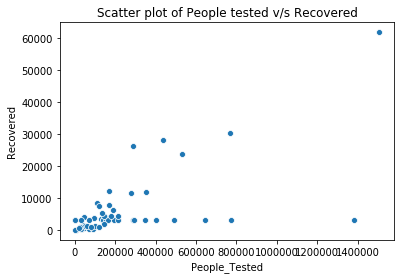

In [339]:
sns.scatterplot(df['People_Tested'],df['Recovered'])
plt.title("Scatter plot of People tested v/s Recovered")
plt.show()

From the above scatterplot it can be observed that People tested and recovered are very very slightly positively correlated.

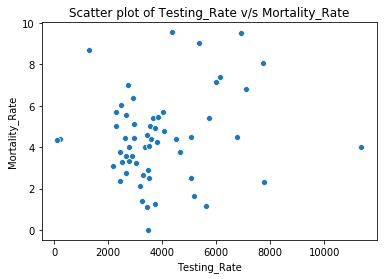

In [340]:
sns.scatterplot(df['Testing_Rate'],df['Mortality_Rate'])
plt.title("Scatter plot of Testing_Rate v/s Mortality_Rate")
plt.show()

From the above scatterplot it can be observed that Testing rate and mortality rate have very less correlation between them.

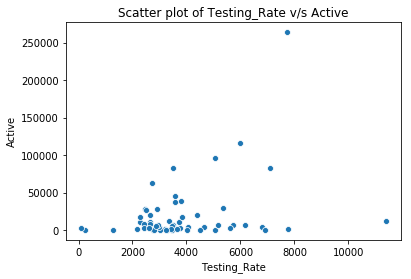

In [342]:
sns.scatterplot(df['Testing_Rate'],df['Active'])
plt.title("Scatter plot of Testing_Rate v/s Active")
plt.show()

From the above scatterplot it can be observed that Testing rate and active numbers donot have significant relationship.

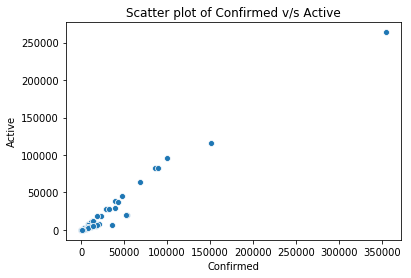

In [343]:
sns.scatterplot(df['Confirmed'],df['Active'])
plt.title("Scatter plot of Confirmed v/s Active")
plt.show()

From the above scatterplot it can be observed that confirmed and active are positively correlated.

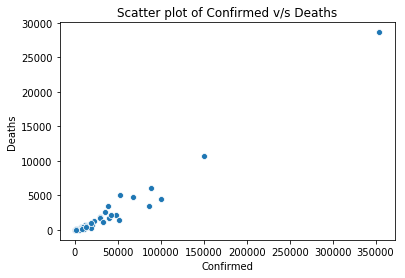

In [344]:
sns.scatterplot(df['Confirmed'],df['Deaths'])
plt.title("Scatter plot of Confirmed v/s Deaths")
plt.show()

From the above scatterplot it can be observed that confirmed and deaths are slightly positively correlated.

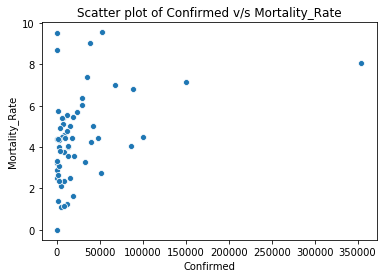

In [345]:
sns.scatterplot(df['Confirmed'],df['Mortality_Rate'])
plt.title("Scatter plot of Confirmed v/s Mortality_Rate")
plt.show()

From the above scatterplot it can be observed that confirmed and mortality rate have no significant relationship

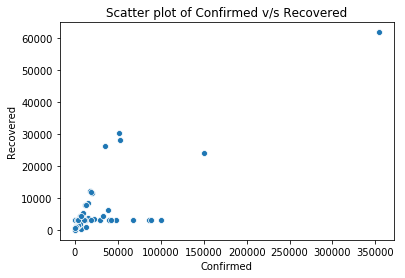

In [346]:
sns.scatterplot(df['Confirmed'],df['Recovered'])
plt.title("Scatter plot of Confirmed v/s Recovered")
plt.show()

From the above scatterplot it can be observed that confirmed and recovered are slightly positively correlated.

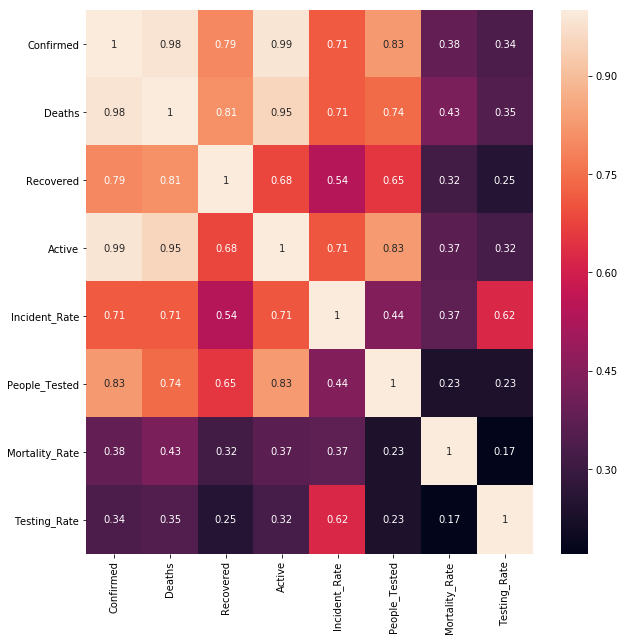

In [347]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

From the above heatmap we can observe that 'Deaths' is more correlated with People tested,Incident rate,active,recovered and confirmed.

### Get Dummies

In [348]:
status=pd.get_dummies(df.ISO3,drop_first=True,prefix="ISO")
df=pd.concat([df,status],axis=1)
df.drop("ISO3",axis=1,inplace=True)

### Removing the outliers

In [349]:
from scipy import stats

In [350]:
z = np.abs(stats.zscore(df))

In [351]:
df1 = df[(z < 3.3).all(axis=1)]

In [352]:
df1.shape

(50, 13)

In [353]:
df1.skew()

Confirmed         1.899198
Deaths            2.078861
Recovered         2.847559
Active            2.455133
Incident_Rate     1.630721
People_Tested     1.846587
Mortality_Rate    0.402198
Testing_Rate      0.845479
ISO_GUM           0.000000
ISO_MNP           0.000000
ISO_PRI           0.000000
ISO_USA          -7.071068
ISO_VIR           0.000000
dtype: float64

In [354]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 57
Data columns (total 13 columns):
Confirmed         50 non-null int64
Deaths            50 non-null int64
Recovered         50 non-null float64
Active            50 non-null float64
Incident_Rate     50 non-null float64
People_Tested     50 non-null float64
Mortality_Rate    50 non-null float64
Testing_Rate      50 non-null float64
ISO_GUM           50 non-null uint8
ISO_MNP           50 non-null uint8
ISO_PRI           50 non-null uint8
ISO_USA           50 non-null uint8
ISO_VIR           50 non-null uint8
dtypes: float64(6), int64(2), uint8(5)
memory usage: 3.8 KB


In [355]:
df1.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate,ISO_GUM,ISO_MNP,ISO_PRI,ISO_USA,ISO_VIR
0,13052,522,3008.0,12530.0,266.194321,164450.0,3.999387,3353.942386,0,0,0,1,0
1,401,10,352.0,39.0,54.815493,37045.0,2.493766,5063.940017,0,0,0,1,0
2,0,0,3008.0,0.0,0.000000,124.0,4.403318,222.857246,0,0,0,0,0
3,14906,747,3773.0,10386.0,204.788838,165435.0,5.011405,2272.859351,0,0,0,1,0
4,5003,107,3852.0,1044.0,165.782801,96258.0,2.138717,3189.670370,0,0,0,1,0


### Define X and y

In [356]:
X=df1.drop('Deaths',axis=1)
X.columns

Index(['Confirmed', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'Mortality_Rate', 'Testing_Rate', 'ISO_GUM', 'ISO_MNP', 'ISO_PRI',
       'ISO_USA', 'ISO_VIR'],
      dtype='object')

In [357]:
X.shape

(50, 12)

In [358]:
y=df1['Deaths']
y.head()

0    522
1     10
2      0
3    747
4    107
Name: Deaths, dtype: int64

In [359]:
y.shape

(50,)

### Train and test split

In [360]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=102)

In [361]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from numpy import sqrt

### Using GridsearchCV to find the best parameters.

In [362]:
#GridsearchCV for Decision Tree regressor
parameters={'max_depth':[5,8],'random_state':range(50,105)}
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'max_depth': 5, 'random_state': 98}


In [363]:
#GridsearchCV for Random forest Regressor
parameters={'max_leaf_nodes':[5,25],'random_state':range(40,101),'max_depth':[20,25]}
rfc=RandomForestRegressor()
clf=GridSearchCV(rfc,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'max_depth': 20, 'max_leaf_nodes': 5, 'random_state': 70}


In [364]:
#GridsearchCV for Lasso
parameters={'max_iter':[500,1000,2000],'alpha':[1.0,1.5,2.0],'random_state':range(50,110)}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'alpha': 2.0, 'max_iter': 500, 'random_state': 50}


In [365]:
#GridsearchCV for Ridge
parameters={'max_iter':[1000,1500,2000,2500],'alpha':[1.0,1.5,2.0,1.2],'random_state':range(45,110)}
ridge=Ridge()
clf=GridSearchCV(ridge,parameters)
clf.fit(X,y)
print(clf.best_params_)

{'alpha': 1.0, 'max_iter': 1000, 'random_state': 45}


In [366]:
ridge=Ridge(alpha= 2.0, max_iter=1000, random_state=45)
lasso=Lasso(alpha= 2.0, max_iter=500, random_state=50)
rfc=RandomForestRegressor(max_depth= 20, max_leaf_nodes= 25, random_state=72)
dtr=DecisionTreeRegressor(max_depth= 8, random_state= 86)

In [367]:
models=[ridge,lasso,dtr,rfc,LinearRegression()]
for m in models:
    m.fit(X_train,y_train)
    y_pred_train=m.predict(X_train)
    print("\n fitting",m,"model:\n")
    print("r2 score:",r2_score(y_train,y_pred_train))
    y_pred_test=m.predict(X_test)
    print("r2score of test data:",r2_score(y_test,y_pred_test))


 fitting Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=45, solver='auto', tol=0.001) model:

r2 score: 0.9286514679982409
r2score of test data: 0.9638357688406559

 fitting Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=500,
   normalize=False, positive=False, precompute=False, random_state=50,
   selection='cyclic', tol=0.0001, warm_start=False) model:

r2 score: 0.9286466354543519
r2score of test data: 0.9637716399497549

 fitting DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=86, splitter='best') model:

r2 score: 0.9999990808022502
r2score of test data: 0.8911830480846066

 fitting RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', m

From the above results of fitting different models, we can conclude that Linear regression is giveing better r2 score for both train and test data.

In [368]:
#Saving the model
from sklearn.externals import joblib

In [369]:
joblib.dump(LinearRegression(),'covid_19_LR.pkl')

['covid_19_LR.pkl']